In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
searched_genre = "action"

## Getting data from csv file

In [3]:
df1 = pd.read_csv('games_of_all_time.csv')
df1

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",https://www.metacritic.com/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,https://www.metacritic.com/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,https://www.metacritic.com/game/xbox-one/ooo-a...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",https://www.metacritic.com/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E


## Cleaning data

In [4]:
df2 = df1.drop(['url', 'developer'], 1)
df2.head()

/var/folders/7j/9ssbljln6_q6p_x1_dwt02500000gp/T/ipykernel_7227/2608373964.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df1.drop(['url', 'developer'], 1)


,game_name,meta_score,user_score,platform,description,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...","['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...","['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [5]:
df2.isnull().sum()

game_name         0
meta_score        0
user_score        0
platform          0
description       0
genre             4
type           2104
rating         1140
dtype: int64

In [6]:
df2.fillna('No Data', inplace = True)

In [7]:
df2.isnull().sum()

game_name      0
meta_score     0
user_score     0
platform       0
description    0
genre          0
type           0
rating         0
dtype: int64

In [8]:
df2['genre'] = df2['genre'].str.replace('[', '', regex = True)
df2['genre'] = df2['genre'].str.replace(']', '', regex = True)
df2['genre'] = df2['genre'].str.replace("'", '', regex = True)
df2['genre'] = df2['genre'].str.replace("'", '', regex = True)
df2['genre'] = df2['genre'].str.replace('"', '', regex = True)
df2['platform'] = df2['platform'].str.replace('[', '', regex = True)
df2['platform'] = df2['platform'].str.replace(']', '', regex = True)
df2['platform'] = df2['platform'].str.replace("'", '', regex = True)
df2['platform'] = df2['platform'].str.replace("'", '', regex = True)
df2['platform'] = df2['platform'].str.replace("-", ' ', regex = True)
df2.head()

,game_name,meta_score,user_score,platform,description,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...","Action Adventure, Fantasy",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,wii,[Metacritic's 2007 Wii Game of the Year] The u...,"Action, Platformer, 3D",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,wii,"Super Mario Galaxy 2, the sequel to the galaxy...","Action, Platformer, 3D",singleplayer,E
3,Metroid Prime,97.0,89.0,gamecube,Samus returns in a new mission to unravel the ...,"Action, Shooter, First-Person, Sci-Fi",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,switch,New Evolution of Mario Sandbox-Style Gameplay....,"Action, Platformer, 3D",singleplayer,E10+


In [9]:
df3 = df2.rename(columns={f'game_name': 'Game Name', 'meta_score': 'Meta Score', 'user_score': 'User Score',
                    'platform': 'Platform', 'description': 'Description', 'genre': 'Genre', 'type':'Player Type',
                    'rating': 'ESRB Rating'})
df3

,Game Name,Meta Score,User Score,Platform,Description,Genre,Player Type,ESRB Rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...","Action Adventure, Fantasy",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,wii,[Metacritic's 2007 Wii Game of the Year] The u...,"Action, Platformer, 3D",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,wii,"Super Mario Galaxy 2, the sequel to the galaxy...","Action, Platformer, 3D",singleplayer,E
3,Metroid Prime,97.0,89.0,gamecube,Samus returns in a new mission to unravel the ...,"Action, Shooter, First-Person, Sci-Fi",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,switch,New Evolution of Mario Sandbox-Style Gameplay....,"Action, Platformer, 3D",singleplayer,E10+
...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"xbox, playstation 2","In a world on the brink of global conflict, yo...","Action, Shooter, Third-Person, Modern",singleplayer,T
8827,nail'd,69.0,76.0,pc,nail’d is all about eschewing boring realism f...,"Driving, Racing, Arcade, Automobile",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,xbox one,oOo: Ascension is a lightning-paced test of re...,"Action, General, Arcade",multiplayer,E
8829,uDraw Studio,71.0,71.0,wii,"Packaged with the uDraw GameTablet, uDraw Stud...","Miscellaneous, General",No Data,E


In [10]:
f = lambda x: 'genre_{}'.format(x + 1)
df4 = pd.DataFrame(df2['genre'].str.split(',').values.tolist(),
    df2.index, dtype=object
).fillna(0).rename(columns=f)

In [12]:
pd.set_option('display.max_colwidth', None)
gen_1 = df4['genre_1'].str.get_dummies().astype(int)
gen_2 = df4['genre_2'].str.get_dummies().astype(int)
gen_3 = df4['genre_3'].str.get_dummies()
gen_4 = df4['genre_4'].str.get_dummies()
gen_5 = df4['genre_5'].str.get_dummies()
gen_6 = df4['genre_6'].str.get_dummies()
gen_7 = df4['genre_7'].str.get_dummies()
gen_8 = df4['genre_8'].str.get_dummies()
gen_9 = df4['genre_9'].str.get_dummies()
gen_10 = df4['genre_10'].str.get_dummies()
list(gen_1.columns)

['2D',
 '3D',
 'Action',
 'Action Adventure',
 'Action RPG',
 'Adventure',
 'Arcade',
 'Beat-Em-Up',
 'Breeding/Constructing',
 'Card Battle',
 'City Building',
 'Compilation',
 'Console-style RPG',
 'Dancing',
 'Driving',
 'Fantasy',
 'Fighting',
 'First-Person',
 'Futuristic',
 'GT / Street',
 'General',
 'Government',
 'Historic',
 'Horror',
 'Ice Hockey',
 'Japanese-Style',
 'Massively Multiplayer',
 'Massively Multiplayer Online',
 'Military',
 'Miscellaneous',
 'Modern',
 'Music',
 'No Data',
 'Olympic Sports',
 'Other',
 'PC-style RPG',
 'Party',
 'Pinball',
 'Platformer',
 'Puzzle',
 'Racing',
 'Rally / Offroad',
 'Role-Playing',
 'Sci-Fi',
 'Scrolling',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Third-Person',
 'Traditional',
 'Turn-Based',
 'Tycoon',
 'WWI']

In [13]:
r = lambda x: 'platform_{}'.format(x + 1)
df5 = pd.DataFrame(df3['Platform'].str.split(',').values.tolist(),
    df3.index, dtype=object
).fillna(0).rename(columns=r)
plat = df5['platform_1'].str.get_dummies()
list(plat.columns)

['3ds',
 'dreamcast',
 'ds',
 'game boy advance',
 'gamecube',
 'nintendo 64',
 'pc',
 'playstation',
 'playstation 2',
 'playstation 3',
 'playstation 4',
 'playstation 5',
 'playstation vita',
 'psp',
 'stadia',
 'switch',
 'wii',
 'wii u',
 'xbox',
 'xbox 360',
 'xbox one',
 'xbox series x']

## Getting the data I want

In [14]:
genre_list = df2['genre'].value_counts()
genre_list

Action, Platformer, 2D                                                 403
Role-Playing, Action RPG                                               303
Action, General                                                        270
Adventure, General                                                     204
Action, Platformer, 3D                                                 175
                                                                      ... 
Action, Action Adventure, Shooter, Open-World, Third-Person, Sci-Fi      1
Strategy, Adventure, Real-Time, 3D, First-Person, Sci-Fi, Command        1
Adventure, Puzzle, General, 3D, First-Person                             1
General, Role-Playing, Console-style RPG, Roguelike                      1
Action Adventure, Modern, Sci-Fi, Open-World                             1
Name: genre, Length: 1307, dtype: int64

In [25]:
games = df3[df3['Genre'].str.contains(searched_genre, case = False)]
# games = temp.reset_index()
games

,Game Name,Meta Score,User Score,Platform,Description,Genre,Player Type,ESRB Rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,nintendo 64,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","Action Adventure, Fantasy",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,wii,"[Metacritic's 2007 Wii Game of the Year] The ultimate Nintendo hero is taking the ultimate step ... out into space. Join Mario as he ushers in a new era of video games, defying gravity across all the planets in the galaxy. When some creature escapes into space with Princess Peach, Mario gives chase, exploring bizarre planets all across the galaxy. Mario, Peach and enemies new and old are here. Players run, jump and battle enemies as they explore all the planets in the galaxy. Since this game makes full use of all the features of the Wii Remote, players have to do all kinds of things to succeed: pressing buttons, swinging the Wii Remote and the Nunchuk, and even pointing at and dragging things with the pointer. Since he's in space, Mario can perform mind-bending jumps unlike anything he's done before. He'll also have a wealth of new moves that are all based around tilting, pointing and shaking the Wii Remote. Shake, tilt and point! Mario takes advantage of all the unique aspects of the Wii Remote and Nunchuk controller, unleashing new moves as players shake the controller and even point at and drag items with the pointer. [Nintendo]","Action, Platformer, 3D",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,wii,"Super Mario Galaxy 2, the sequel to the galaxy-hopping original game, includes the gravity-defying, physics-based exploration from the first game, but is loaded with entirely new galaxies and features to challenge players. On some stages, Mario can pair up with his dinosaur buddy Yoshi and use his tongue to grab items and spit them back at enemies. Players can also have fun with new items such as a drill that lets our hero tunnel through solid rock. [Nintendo]","Action, Platformer, 3D",singleplayer,E
3,Metroid Prime,97.0,89.0,gamecube,"Samus returns in a new mission to unravel the mystery behind the ruined walls scattered across Tallon IV. In Metroid Prime, you'll play the role of this bounty hunter and view the world through her visor, which displays information ranging from current energy levels to ammunition. Equipped with a Power Beam and Gravity Suit, you must shoot locked switches, solve puzzles, and eliminate enemies. It's up to you to explore the world and recover more power-ups and weapons, which gradually open more gameplay areas.","Action, Shooter, First-Person, Sci-Fi",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,switch,"New Evolution of Mario Sandbox-Style Gameplay. Mario embarks on a new journey through unknown worlds, running and jumping through huge 3D worlds in the first sandbox-style Mario game since Super Mario 64 and Super Mario Sunshine. Set sail between expansive worlds aboard an airship, and perform all-new actions, such as throwing Mario's cap.","Action, Platformer, 3D",singleplayer,E10+
...,...,...,...,...,...,...,...,...
8824,htoL#NiQ: The Firefly Diary,58.0,75.0,playstation vita,"htoL#NiQ: The Firefly Diary focuses on Mion, a young girl with amnesia who is lost in labrynthine ruin. Unclear of where to go, Mion follows two fireflies – one light, one dark — as they guide her through the maze. Players manipulate the fireflies using the PS Vita’s touch controls, leading Mion through the World of Light and the World of Shadow.","Action, General, Platformer, 2D",No Data,T
8825,inFamous,85.0,83.0,playstation 3,"A massive explosion rips through six square blocks of Empire City, 

In [16]:
num_of_games = len(games.index)

In [19]:
games['Meta Score'].value_counts()

80.00    181
76.00    178
77.00    167
74.00    163
72.00    158
        ... 
36.50      1
46.50      1
39.25      1
56.33      1
46.67      1
Name: Meta Score, Length: 262, dtype: int64

## Random game based on genre

In [28]:
platform_list = ['xbox-one', 'playstation-4']
mask = games.Platform.apply(lambda x: any(item for item in platform_list if item in x))
games2 = games[mask]
games.query('((`Meta Score` + `User Score`) / 2) > 50.0').sample(10)

,Game Name,Meta Score,User Score,Platform,Description,Genre,Player Type,ESRB Rating
8086,The Hong Kong Massacre,65.0,56.3,"playstation 4, pc, switch","Blast your way through the streets of Hong Kong in a fast-paced, top-down shooter.\r\n\r\nInspired by classic action movies, The Hong Kong Massacre places you at the center of a hard-boiled revenge story, filled with brutal, cinematic shootouts and vivid underworld locations.\r\n\r\nTake on the role of a former police detective bent on exacting vengeance for his partner's murder and use of a mixture of raw firepower, slow-motion, and dive/dodge mechanics to tear your way through the criminal ranks.\r\n\r\nDive through windows or dodge behind cover - every shot is lethal, so stay aware of your surroundings and exploit the environment however you can.\r\n\r\nWhen the heat is on, you can slow down time and plan for the next move. Avoiding bullets whilst taking out enemies is crucial for survival - but beware, your slow-motion ability is limited: plan fast, think ahead and bring down the bad guys unscathed.\r\n\r\nEach level features a range of challenges, allowing you to unlock new weapons as you progress, trading bullets from restaurants to rooftops across a moody, crime-riddled city.","Action, Shooter, Shoot-Em-Up, Top-Down",singleplayer,No Data
2030,Yumi's Odd Odyssey,74.0,77.0,3ds,"(Also known as ""Sayonara Umihara Kawase"") Using her fishing hook, Yumi must make her way through a variety of levels by running, jumping, and throwing her coveted fishing line. Yumi can use her fishing line to swing between platforms, lower herself down to other ledges, and even catapult herself great distances by stretching the line to its breaking point.","Platformer, 2D, Action",No Data,E
5450,Enclave,71.0,71.0,pc,"In an age long past, the rift was formed, decisively separating the lands of light and the plains of darkness by an impassable chasm. Over time the Enclave of light grew strong and prosperous, while those confined to war-ravaged plains of the outlands harbored nothing but hatred and jealousy. Now, after hundreds of years, the rift is closing, and it is only a matter of time before a full-scale war erupts. Enter the fantasy universe of Enclave where the eternal struggle between good and evil rages, and your actions will determine the fate of a nation. [Vivendi Universal]","Action Adventure, Fantasy, General",singleplayer,M
4631,BioShock 2,88.0,81.5,"playstation 3, pc","Set approximately 10 years after the events of the original BioShock, the halls of Rapture once again echo with sins of the past. Along the Atlantic coastline, a monster has been snatching little girls and bringing them back to the undersea city of Rapture. You are the very first Big Daddy as you travel through the decrepit and beautiful fallen city, chasing an unseen foe in search of answers and your own survival. Multiplayer in BioShock 2 provides a rich prequel experience that expands the BioShock gameplay. Set during the fall of Rapture, players assume the role of Plasmid test subject in the underwater city that was first explored in the original BioShock. Players will need to use all the elements of the game's toolset to survive as the full depth of the BioShock experience is refined and transformed into a unique multiplayer experience that can only be found in Rapture. [2K Games]","Action, Shooter, First-Person, Sci-Fi, Arcade",multiplayer,M
2113,Galaga Legions,74.0,79.0,xbox 360,"[Xbox Live Arcade] This isn't just a boring remake. Featuring table-turning game dynamics, super-slick visuals, and vast waves of enemies, this is the definitive version of the arcade shooter classic. Classic Galaga action redefined: Galaga, the classic top-down arcade shooter released by Namco in 1981, is many fans' favorite arcade game of all time. Now, completely updated and revitalized, Galaga Legions bursts onto the scene with new game dynamics and spectacular graphics. New achievements are offered for you to conquer. Show the world 

# Visualizations

### Top 10 games by meta score

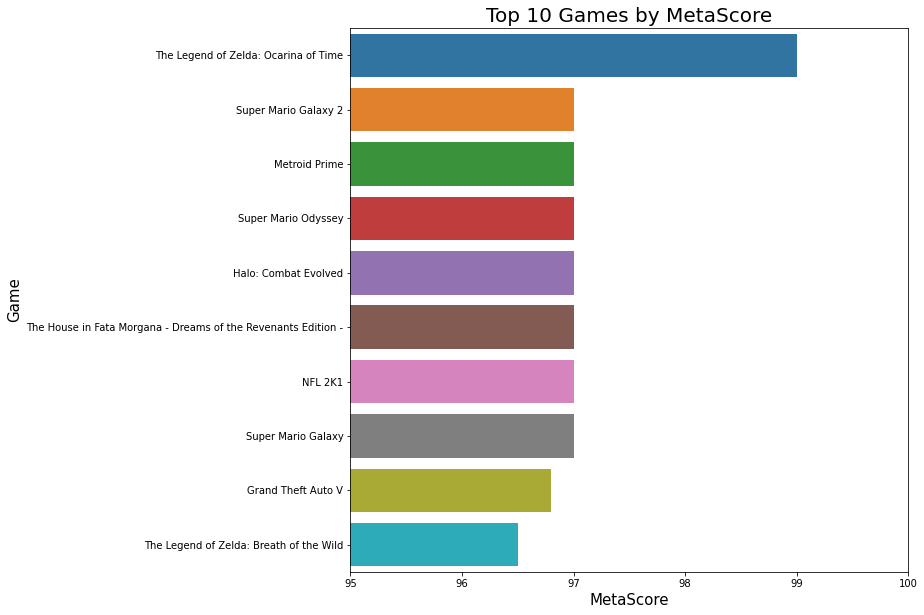

In [29]:
top_meta = pd.DataFrame(df2['meta_score'].sort_values(ascending=False))
top_meta['game_name'] = df2['game_name']
top_meta = top_meta.head(10)
plt.figure(figsize=(10,10))
sns.barplot(x = 'meta_score', y = 'game_name', data = top_meta)
plt.xlabel("MetaScore", size = 15)
plt.ylabel("Game", size = 15)
plt.title("Top 10 Games by MetaScore", size = 20)
plt.xlim(95, 100)
plt.show()

### Top 10 Games by User Score

(90.0, 100.0)

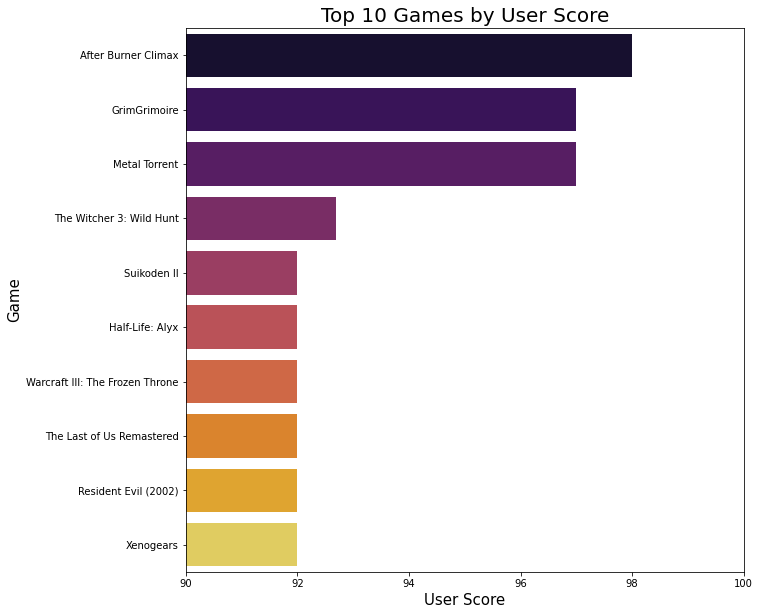

In [30]:
top_user = pd.DataFrame(df2['user_score'].sort_values(ascending=False))
top_user['game_name'] = df2['game_name']
top_user = top_user.head(10)
plt.figure(figsize=(10,10))
sns.barplot(x = 'user_score', y = 'game_name', data = top_user, palette = 'inferno')
plt.xlabel("User Score", size = 15)
plt.ylabel("Game", size = 15)
plt.title("Top 10 Games by User Score", size = 20)
plt.xlim(90, 100)

### Top 10 Most Common Genres

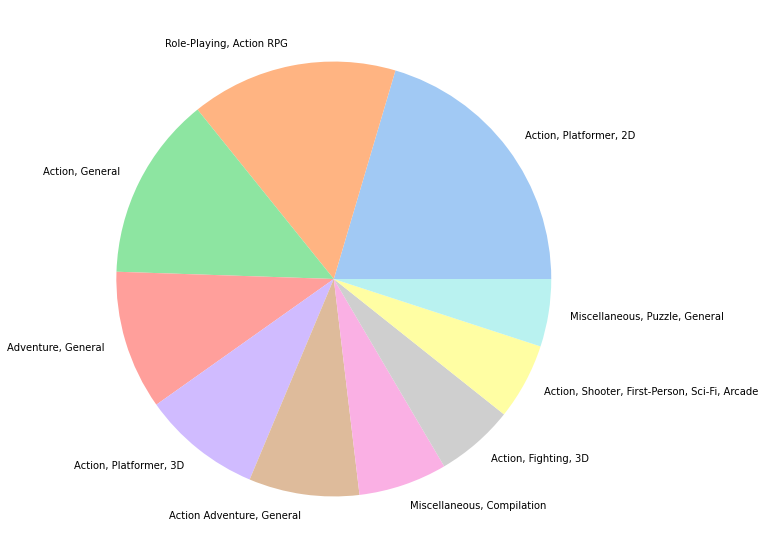

In [31]:
plt.figure(figsize=(10,10))
data = genre_list.head(10)
labels = data.index
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors)
plt.show()

### Count of ESRB Ratings

<AxesSubplot:xlabel='rating', ylabel='count'>

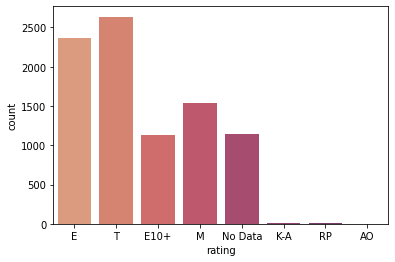

In [32]:
sns.countplot(x = 'rating', data = df2, palette = 'flare')

### Top 10 Consoles with the Most Games

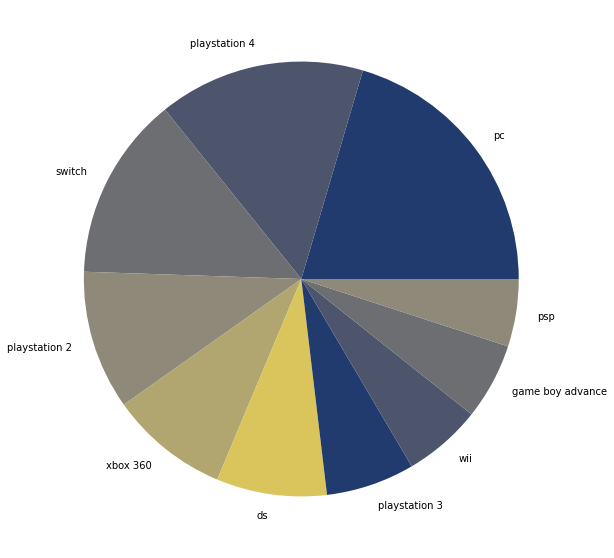

In [33]:
console_list = df2['platform'].value_counts()
console_list2 = console_list.head(10)
plt.figure(figsize=(10,10))
labels = console_list2.index
colors = sns.color_palette('cividis')
plt.pie(data, labels = labels, colors = colors)
plt.show()